In [86]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import plotly.express as px
plt.rcParams['figure.figsize']=(25,6)
np.random.seed(0)
import random
random.seed(0)

In [208]:

def sine(length, freq=0.04, coef=1.5, offset=0.0, noise_amp=0.05):
    # timestamp = np.linspace(0, 10, length)
#     freq = np.random.choice(0.2)
    timestamp = np.arange(length)
    value = np.sin(2 * np.pi * freq * timestamp)
    if noise_amp != 0:
        noise = np.random.normal(1, 2, length)
        value = value + noise_amp * noise
    value = coef * value + offset
    return value

def square_sine(level, length, freq, coef, offset, noise_amp):
    value = np.zeros(length)
    for i in range(level):
        value += 1 / (2 * i + 1) * sine(length=length, freq=freq * (2 * i + 1), coef=coef, offset=offset, noise_amp=noise_amp)
    return value


In [209]:
class  Synthetic_data:
    def __init__(self):    
        df = pd.read_csv("continuous_dataset.csv")
        self.dup = df.copy()
        self.data = df['nat_demand']
        self.offset = np.mean(self.data)
        self.length = len(self.data)
        self.label = np.zeros_like(self.data)
    def sine(self,length, freq=0.04, coef=1.5, offset=0.0, noise_amp=0.05):
        timestamp = np.arange(length)
        value = np.sin(2 * np.pi * freq * timestamp)
        if noise_amp != 0:
            noise = np.random.normal(1, 2, length)
            value = value + noise_amp * noise
        value = coef * value + offset
        return value

    def index_inj(self,radius,ratio):
        np.random.seed(62)
        position = np.random.randint(low=0,high=self.length,size=round(self.length*ratio/(2*radius)))
        return position
    def sub_data(self,freq,length,coef,offset,noise_amp=0.01,level=5):
        timestamp = np.arange(length)
        value = np.zeros(length)
        for i in range(level):
            value += 1 / (2 * i + 1) * sine(length=length, freq=freq * (2 * i + 1), coef=coef, offset=offset, noise_amp=noise_amp)
        return value
    def generate_data(self,radius=50,ratio=0.04):
        position = self.index_inj(radius,ratio)
        self.indices = []
        for i in position:
            start,end = max(0,i-np.random.randint(0,radius)),min(self.length,i+np.random.randint(0,radius+1))
            freq_d = np.random.choice(np.random.rand(10))
            length_d = end-start
            coef_d = np.random.randint(1000)*np.random.choice([-1,1])
            offset_d = np.random.randint(self.offset)
            # print(start,end,freq_d,coef_d,offset_d)
            
            self.data[start:end] = self.sub_data(freq_d,length_d,coef_d,offset_d)
            self.indices.append([start,end-1])
            self.label[start:end]=1
    def percentage(self):
        print(len(self.label[self.label==1])/len(self.data)*100)
    def plot_graph(self):
        for i in self.indices:
            plt.axvspan(i[0],i[1],color='RED',alpha = 0.3)
        plt.plot(self.data)
    def savedateset(self):
        data = pd.DataFrame({'datetime':self.dup['datetime'],'nat_demand':self.data,'label':self.label})
        data.to_csv("elect_2_percent.csv",index=False)

1.406926406926407


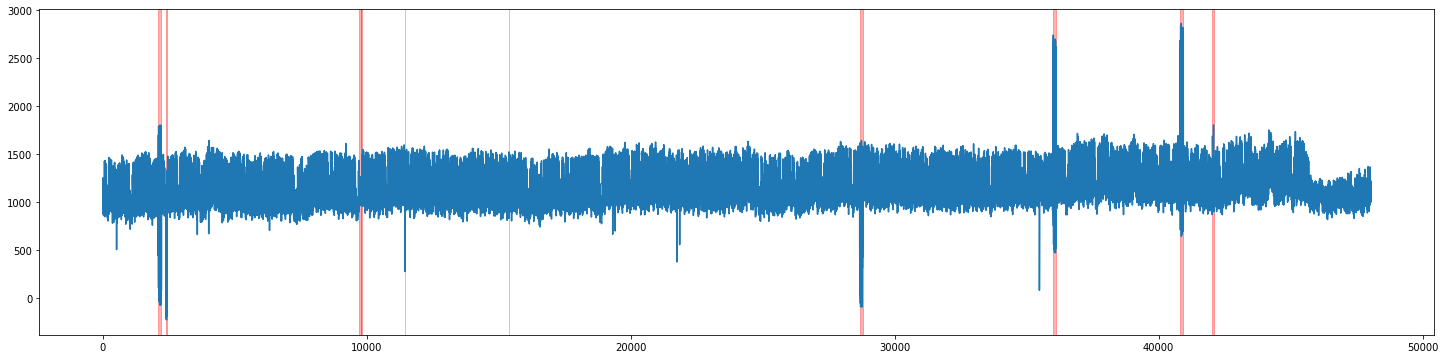

In [220]:
obj = Synthetic_data()
obj.generate_data()
obj.percentage()
obj.plot_graph()

In [221]:
fig = px.line(obj.data)
fig.show()


In [128]:
np.random.seed(2)
np.random.rand(10)

array([0.4359949 , 0.02592623, 0.54966248, 0.43532239, 0.4203678 ,
       0.33033482, 0.20464863, 0.61927097, 0.29965467, 0.26682728])

In [207]:
d = Synthetic_data()
d.index_inj(50,0.2)

array([ 9746, 15384,  9809, 40841,  2163, 36107, 42042, 11445, 28689,
        2404, 16798, 16301, 32865,  6237, 15945, 35955, 28554, 18771,
       21790,  6677,  8298, 46472,  3406, 14464, 36493, 19585,  6668,
       42106, 23009, 27321, 28104, 32199, 11388, 43444, 10403, 44530,
       16016, 19549, 29942, 42018,  4321, 29731,  7040, 24709, 20167,
       24215,  1513,  9419, 28911,  7445, 35756, 35955, 40580,     8,
       30288, 35525, 45534,  9330, 11117, 31892, 32817, 43843, 41402,
        8776,  8726, 44402, 44511, 45380, 38698, 30658, 24932, 43460,
        1091,  2776, 47345, 40138,  7906,  2127, 39670, 34522, 42654,
        4083, 20830, 24959, 46387, 27727, 16102, 11089, 46805, 24180,
       27461, 37652, 30484, 23656, 10868, 28769])

In [197]:
for k in obj.indices:
    print(k[1]-k[0])

74
132
101
131
142
119
80
93
105
50
